In [76]:
import pandas as pd 
import numpy as np
import random
import requests
import time
import pickle as pkl

import matplotlib.pyplot as plt
%matplotlib inline

import json

In [724]:
N_SAMPLES = 1000
N_POINTS = 40

Человеческие данные:

In [678]:
with open('points.pkl', 'rb') as f:
    data = pkl.load(f)

In [679]:
good_idxs = []
for i in range(len(data)):
    if np.array(data[i]).shape != (40, 2):
        print(i, np.array(data[i]).shape)
    else:
        good_idxs.append(i)
        
    

20 (8, 2)
22 (10, 2)
23 (3544, 2)
25 (39, 2)
37 (39, 2)
39 (38, 2)
40 (38, 2)
41 (38, 2)
42 (39, 2)
44 (36, 2)
52 (39, 2)
162 (39, 2)
170 (39, 2)
205 (39, 2)
238 (39, 2)
251 (39, 2)
352 (49, 2)
360 (39, 2)
495 (37, 2)
689 (37, 2)
729 (37, 2)
833 (39, 2)
1072 (80, 2)
1107 (80, 2)
1132 (10, 2)
1167 (60, 2)
1168 (119, 2)
1169 (97, 2)
1170 (107, 2)
1175 (94, 2)
1178 (171, 2)
1179 (144, 2)
1180 (99, 2)
1181 (126, 2)
1182 (99, 2)
1210 (101, 2)
1211 (96, 2)
1212 (96, 2)
1213 (95, 2)
1214 (104, 2)
1216 (98, 2)
1219 (92, 2)
1220 (89, 2)
1221 (90, 2)
1223 (1514, 2)
1224 (101, 2)
1225 (87, 2)
1226 (149, 2)
1227 (97, 2)
1228 (114, 2)
1229 (99, 2)
1230 (100, 2)
1240 (96, 2)
1243 (54, 2)
1244 (81, 2)
1245 (95, 2)
1324 (80, 2)


In [680]:
train_data = np.array([data[i] for i in range(len(data)) if i in good_idxs])

In [681]:
train_data.shape

(1447, 40, 2)

Сгенерим данные

Пока просто рандом

In [725]:
def generate_from_distribution(distrib, n_samples=1, **kwargs):
    data = []
    
    for i in range(n_samples):
        x, y = distrib(size=2, **kwargs)
        data.append([x, y])

    return data

In [726]:
rand_unif = []
for i in range(N_SAMPLES // 20):
    single_rand = np.array(generate_from_distribution(np.random.uniform, n_samples=N_POINTS))
    rand_unif.append(single_rand)
rand_unif = np.array(rand_unif)
rand_unif.shape

(50, 40, 2)

In [727]:
rand_unif_1 = []
for i in range(N_SAMPLES // 20):
    borders = generate_from_distribution(np.random.uniform, n_samples=2)
    a, b = borders[0]
    c, d = borders[1]
    if a > b:
        a, b = b, a
    if c > d:
        c, d = d, c

    xs = np.array(generate_from_distribution(np.random.uniform, n_samples=N_POINTS, low=a, high=b))[:, 0]
    ys = np.array(generate_from_distribution(np.random.uniform, n_samples=N_POINTS, low=c, high=d))[:, 0]
    single_rand = np.array(list(zip(xs, ys)))
    rand_unif_1.append(single_rand)
rand_unif_1 = np.array(rand_unif_1)
np.array(rand_unif_1).shape

(50, 40, 2)

In [728]:
def draw_path(data, x=None, y=None):
    if data is not None:
        plt.plot(data[:, 0], data[:, 1])
    else:
        plt.plot(x, y)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

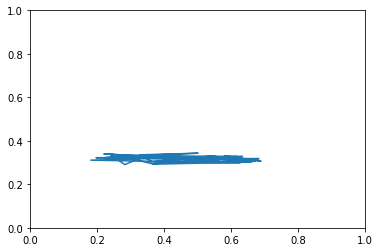

In [729]:
n = 16
draw_path(rand_unif_1[n])

fixed point

In [730]:
fix_point = []
for i in range(40):
    fix_point.append(generate_from_distribution(np.random.uniform, n_samples=1) * 40)
fix_point = np.array(fix_point)
fix_point.shape

(40, 40, 2)

Random walk

In [731]:
def generate_random_walk(scale=0.1):
    random_walk = []
    
    x, y = np.array(generate_from_distribution(np.random.uniform, n_samples=1))[0]
    random_walk.append([x, y])
    
    for i in range(39):
        while True:
            x_incr = np.random.normal(scale=scale)
            if 0 <= x + x_incr <= 1:
                x += x_incr
                break
    
        while True:
            y_incr = np.random.normal(scale=scale)
            if 0 <= y + y_incr <= 1:
                y += y_incr
                break
        
        random_walk.append([x, y])

    return random_walk

In [732]:
random_walks = []
for scale in [0.03, 0.07, 0.1, 0.14, 0.19]:
    for i in range(N_SAMPLES // 50):
        rw = np.array(generate_random_walk(scale=scale))
        random_walks.append(rw)
random_walks = np.array(random_walks)
random_walks.shape

(100, 40, 2)

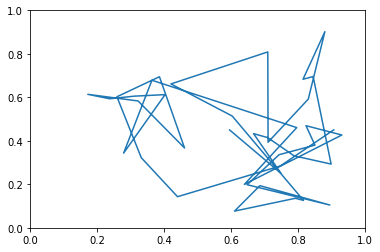

In [733]:
draw_path(random_walks[88])

Pure functions

In [734]:
def generate_function(func, *args):
    while True:
        low, high = np.random.uniform(0, 1, 2)
        if low > high:
            low, high = high, low
        if high - low >= 0.05:
            break
    
    x = np.linspace(low, high, 40)
    y = func(x, *args)
    
    return(list(zip(x, y)))

In [735]:
powers = []
for power in [0.3, 0.5, 1, 2, 3]:
    for i in range(N_SAMPLES // 100):
        pw = np.array(generate_function(np.power, power))
        while True:
            y_shift = np.random.normal(scale=0.2)
            if pw[:, 1].max() + y_shift <= 1 and pw[:, 1].min() + y_shift >= 0:
                pw[:, 1] += y_shift
                break

        powers.append(pw)
powers = np.array(powers)
powers.shape

(50, 40, 2)

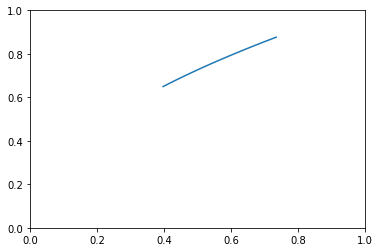

In [736]:
n = 10
draw_path(powers[n])

In [737]:
powers_w_noise = []
for power in [0.3, 0.5, 1, 2, 3]:
    for i in range(N_SAMPLES // 100):
        pw = np.array(generate_function(np.power, power))
        while True:
            y_shift = np.random.normal(scale=0.2)
            if pw[:, 1].max() + y_shift <= 1 and pw[:, 1].min() + y_shift >= 0:
                pw[:, 1] += y_shift
                break
        while True:
            y_noise = np.random.normal(scale=0.003, size=40)
            if (pw[:, 1] + y_noise).max() <= 1 and (pw[:, 1] + y_noise).min() >= 0:
                pw[:, 1] += y_noise
                break


        powers_w_noise.append(pw)

powers_w_noise = np.array(powers_w_noise)
powers_w_noise.shape

(50, 40, 2)

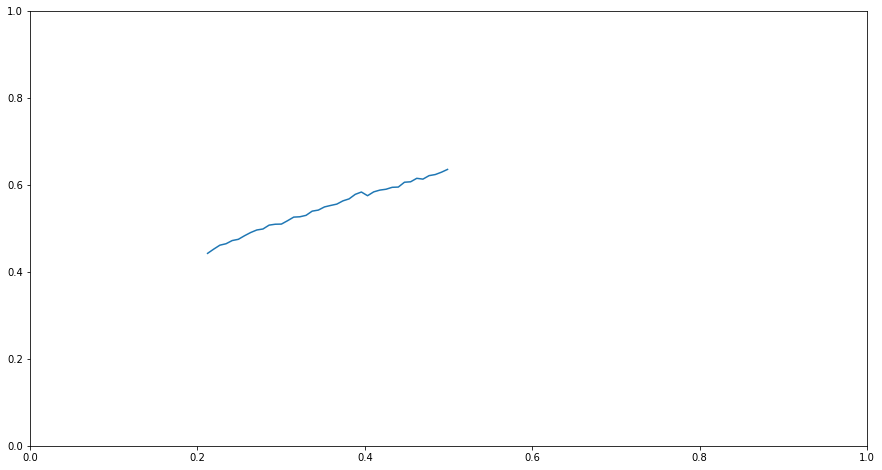

In [738]:
n=2

plt.figure(figsize=(15, 8))
draw_path(powers_w_noise[n])

In [739]:
def generate_function_2(func, *args):
    low = np.random.uniform(-2, 0, 1)
    high = np.random.uniform(0, 2, 1)
    
    x = np.linspace(low, high, 40).reshape(40,)
    y = func(x, *args)
    
    x += abs(low) + abs(np.random.normal(scale=0.4))
    x /= x.max() + abs(np.random.normal(scale=0.4))
    
    y += abs(y.min()) + abs(np.random.normal(scale=0.4))
    y /= y.max() + abs(np.random.normal(scale=0.4))
    return(list(zip(x, y)))

In [740]:
powers_2 = []
for power in [2, 3]:
    for i in range(N_SAMPLES // 40):
        pw = np.array(generate_function_2(np.power, power))
        while True:
            y_shift = np.random.normal(scale=0.2)
            if pw[:, 1].max() + y_shift <= 1 and pw[:, 1].min() + y_shift >= 0:
                pw[:, 1] += y_shift
                break

        powers_2.append(pw)
powers_2 = np.array(powers_2)
powers_2.shape

(50, 40, 2)

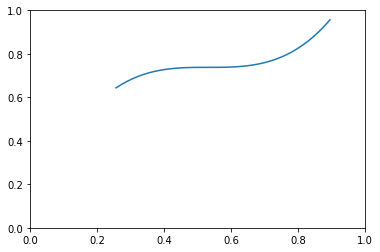

In [741]:
draw_path(powers_2[25])

In [742]:
def generate_function_3(func, *args):
    low = np.random.uniform(-9, -3, 1)
    high = np.random.uniform(3, 9, 1)
    
    x = np.linspace(low, high, 40).reshape(40,)
    y = func(x, *args)
    
    x += abs(low) + abs(np.random.normal(scale=0.4))
    x /= x.max() + abs(np.random.normal(scale=0.4))
    
    y += abs(y.min()) + abs(np.random.normal(scale=0.4))
    y /= y.max() + abs(np.random.normal(scale=0.4))
    return(list(zip(x, y)))

In [743]:
diff_funcs = []
for func in [np.sin, np.cos, np.tan, np.exp]:
    for i in range(N_SAMPLES // 70):
        pw = np.array(generate_function_3(func))
        while True:
            y_shift = np.random.normal(scale=0.2)
            if pw[:, 1].max() + y_shift <= 1 and pw[:, 1].min() + y_shift >= 0:
                pw[:, 1] += y_shift
                break

        diff_funcs.append(pw)
diff_funcs = np.array(diff_funcs)
diff_funcs.shape

(56, 40, 2)

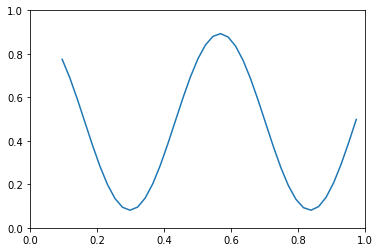

In [744]:
draw_path(diff_funcs[6])

## Спиральки!!!

In [745]:
def generate_spiral(*args):
    low = np.random.uniform(0, 0.2, 1)
    high = np.random.uniform(0.2, 1, 1)
    r = np.linspace(low, high, 40).reshape(40,)

    s_low = np.random.uniform(-20, 0, 1)
    s_high = np.random.uniform(0, 20, 1)
    angle = np.linspace(s_low, s_high, 40).reshape(40,)

    start_0, start_1 = np.array(generate_from_distribution(np.random.uniform, n_samples=1))[0]
    
    x = start_0 + np.sin(angle) * r
    y = start_1 + np.cos(angle) * r
    
    x += -1 * min(x.min(), 0) + abs(np.random.normal(scale=0.3))
    x /= max(1, x.max()) + abs(np.random.normal(scale=0.3))
    
    y += -1 * min(y.min(), 0) + abs(np.random.normal(scale=0.3))
    y /= max(1, y.max()) + abs(np.random.normal(scale=0.3))
    
    return list(zip(x, y))

In [746]:
spirals = []
for i in range(N_SAMPLES // 10):
    pw = np.array(generate_spiral(func))
    
    spirals.append(pw)
spirals = np.array(spirals)
spirals.shape

(100, 40, 2)

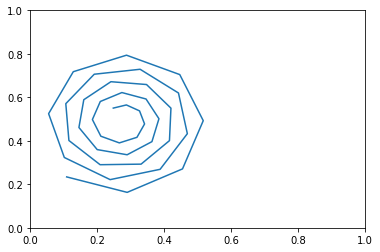

In [747]:
draw_path(spirals[37])

Ломаные

In [748]:
def generate_broken(*args):
    n = np.random.choice(range(2, 10))
    
    broken_line = []
    
    rand_points   = np.array(generate_from_distribution(np.random.uniform, n_samples=n))

    points = 40 - n
    
    iters = [points // (n - 1) + int(i < points % (n - 1)) for i in range(n - 1)]
    assert np.array(iters).sum() == points
    
    for i in range(n - 1):
        broken_line.append(rand_points[i])
        for j in range(iters[i]):
            p = (j + 1) / (iters[i] + 1) + np.random.normal(scale=0.5 / iters[i])
            broken_line.append(p * rand_points[i] + (1 - p) * rand_points[i + 1])
    broken_line.append(rand_points[n-1])
    
    return broken_line

In [749]:
broken_lines = []
for i in range(N_SAMPLES // 10):
    broken_lines.append(np.array(generate_broken()))
broken_lines = np.array(broken_lines)
broken_lines.shape

(100, 40, 2)

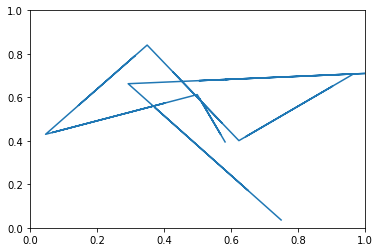

In [750]:
n = 1
draw_path(broken_lines[n])

Collect data!!!!!!

In [751]:
whole_data = []
for lst in [
    broken_lines,
    spirals,
    diff_funcs,
    powers_2,
    powers_w_noise,
    powers,
    fix_point,
    random_walks,
    rand_unif_1,
    rand_unif
]:
    whole_data.extend(lst)

whole_data = np.array(whole_data)
whole_data.shape

(646, 40, 2)

In [752]:
with open('generated_data_test.pkl', 'wb') as f:
    pkl.dump(whole_data, f, protocol=4)